In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(color_codes=True)             # To get diffent different colors
pd.set_option('display.max_columns', None)  # To display the max columns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,\
                            precision_score,\
                            recall_score,\
                            f1_score,\
                            classification_report,\
                            roc_auc_score,roc_curve
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

In [38]:
data=pd.read_csv('cleaned_train_loan_data.csv')
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849.0,0.0,128.0,1.0,2,1
1,1,1,1,0,0,4583.0,1508.0,128.0,1.0,0,0
2,1,1,0,0,1,3000.0,0.0,66.0,1.0,2,1
3,1,1,0,1,0,2583.0,2358.0,120.0,1.0,2,1
4,1,0,0,0,0,6000.0,0.0,141.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900.0,0.0,71.0,1.0,0,1
610,1,1,3,0,0,4106.0,0.0,40.0,1.0,0,1
611,1,1,1,0,0,8072.0,240.0,253.0,1.0,2,1
612,1,1,2,0,0,7583.0,0.0,187.0,1.0,2,1


In [39]:
X = data.drop('Loan_Status', axis=1)
y = data['Loan_Status']

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=0)
print(X_train.shape),
print(X_test.shape),
print(y_train.shape),
print(y_test.shape)

(491, 10)
(123, 10)
(491,)
(123,)


In [5]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [6]:
y_pred_dt=dtree.predict(X_test)
print(y_pred_dt[:10])
print(y_test.values[:10])

[0 1 1 0 1 1 1 1 0 1]
[1 0 1 0 1 0 1 1 0 1]


In [7]:
accuracy_score(y_test,y_pred_dt)

0.7073170731707317

In [8]:
acc_dt=accuracy_score(y_test,y_pred_dt)
pre_dt=precision_score(y_test,y_pred_dt)
recall_dt=recall_score(y_test,y_pred_dt)
f1s_dt=f1_score(y_test,y_pred_dt)
print(round(acc_dt,2))
print(round(pre_dt,2))
print(round(recall_dt,2))
print(round(f1s_dt,2))

0.71
0.83
0.76
0.79


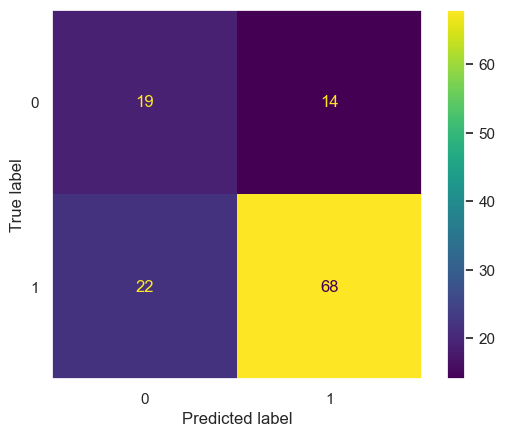

In [9]:
cmt=confusion_matrix(y_test,y_pred_dt)
ConfusionMatrixDisplay(cmt).plot()
plt.grid(False)

In [10]:
y_dt_pred_prob=dtree.predict_proba(X_test)[:,1]

In [11]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr,tpr,threshold=roc_curve(y_test,y_dt_pred_prob)

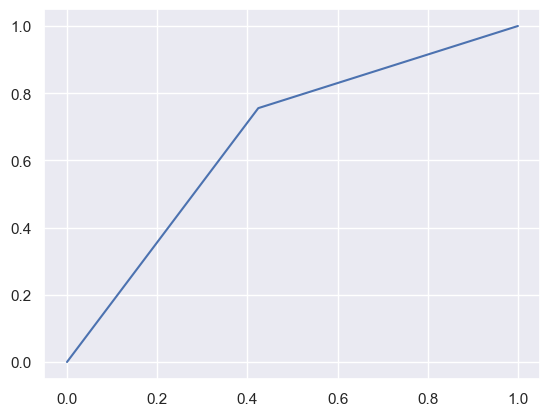

In [12]:
plt.plot(fpr,tpr)

**Logistics regression**

In [41]:
from sklearn.linear_model import LogisticRegression
logtree=LogisticRegression()
loan_lr=logtree.fit(X_train, y_train)


C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [42]:
import pickle
pickle.dump(loan_lr,open('Loan_lr_file.pkl','wb'))

In [43]:
y_pred_log=logtree.predict(X_test)

In [44]:
acc_log=accuracy_score(y_test,y_pred_log)
pre_log=precision_score(y_test,y_pred_log)
recall_log=recall_score(y_test,y_pred_log)
f1s_log=f1_score(y_test,y_pred_log)
print(round(acc_log,2))
print(round(pre_log,2))
print(round(recall_log,2))
print(round(f1s_log,2))

0.83
0.82
0.98
0.89


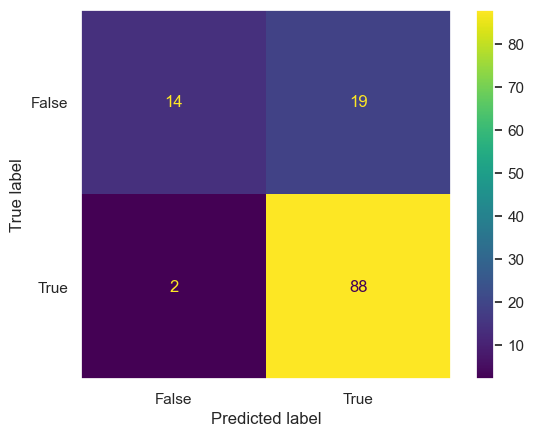

True negative: 14
False postive: 19
False negative: 2
True postive: 88


In [45]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cmt=confusion_matrix(y_test,y_pred_log)

disp=ConfusionMatrixDisplay(confusion_matrix=cmt,
                            display_labels = [False, True])
disp.plot()
plt.grid(False)
plt.show()


tn, fp, fn, tp = confusion_matrix(y_test,y_pred_log).ravel()
print("True negative:",tn)
print("False postive:",fp)
print("False negative:",fn)
print("True postive:",tp)

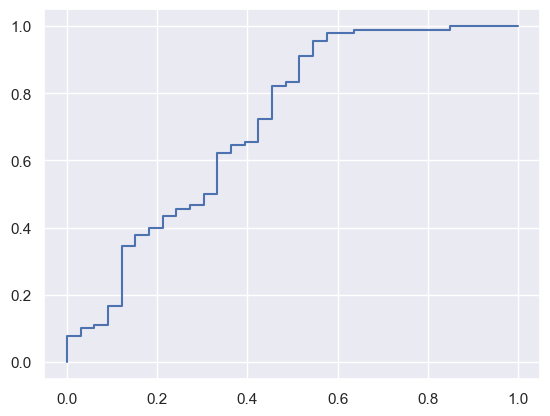

In [46]:
y_log_pred_prob=logtree.predict_proba(X_test)[:,1]   # Class-1 probabilities
fpr,tpr,threshold=roc_curve(y_test,y_log_pred_prob) 
plt.plot(fpr,tpr)
plt.show()

**Naive Bayes**

In [18]:
from sklearn.naive_bayes import GaussianNB
NBtree=GaussianNB()
NBtree.fit(X_train,y_train)

GaussianNB()

In [19]:
y_pred_NB=NBtree.predict(X_test)

In [20]:
acc_NB=accuracy_score(y_test,y_pred_NB)
pre_NB=precision_score(y_test,y_pred_NB)
recall_NB=recall_score(y_test,y_pred_NB)
f1s_NB=f1_score(y_test,y_pred_NB)
print(round(acc_NB,2))
print(round(pre_NB,2))
print(round(recall_NB,2))
print(round(f1s_NB,2))

0.83
0.82
0.98
0.89


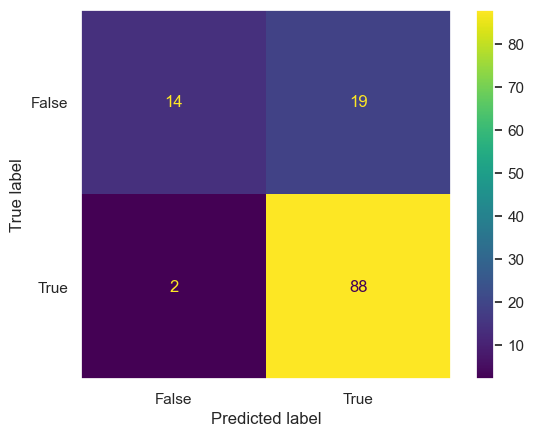

True negative: 14
False postive: 19
False negative: 2
True postive: 88


In [21]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cmt=confusion_matrix(y_test,y_pred_NB)

disp=ConfusionMatrixDisplay(confusion_matrix=cmt,
                            display_labels = [False, True])
disp.plot()
plt.grid(False)
plt.show()


tn, fp, fn, tp = confusion_matrix(y_test,y_pred_NB).ravel()
print("True negative:",tn)
print("False postive:",fp)
print("False negative:",fn)
print("True postive:",tp)

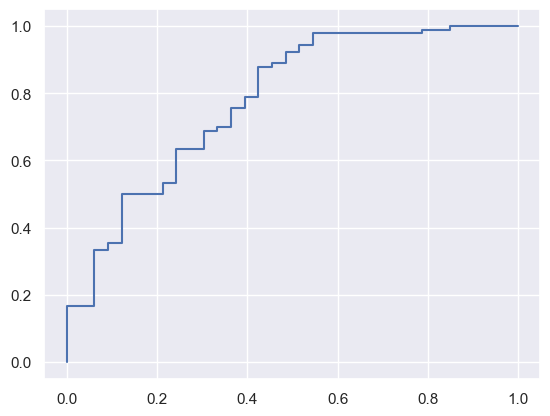

In [29]:
y_NB_pred_prob=NBtree.predict_proba(X_test)[:,1]   # Class-1 probabilities
fpr,tpr,threshold=roc_curve(y_test,y_NB_pred_prob) 
plt.plot(fpr,tpr)
plt.show()

**KNN**

In [23]:
from sklearn.neighbors import KNeighborsClassifier
KNNtree=KNeighborsClassifier()
KNNtree.fit(X_train,y_train)

KNeighborsClassifier()

In [24]:
y_pred_KNN=KNNtree.predict(X_test)

In [25]:
acc_KNN=accuracy_score(y_test,y_pred_KNN)
pre_KNN=precision_score(y_test,y_pred_KNN)
recall_KNN=recall_score(y_test,y_pred_KNN)
f1s_KNN=f1_score(y_test,y_pred_KNN)
print(round(acc_KNN,2))
print(round(pre_KNN,2))
print(round(recall_KNN,2))
print(round(f1s_KNN,2))

0.63
0.72
0.79
0.76


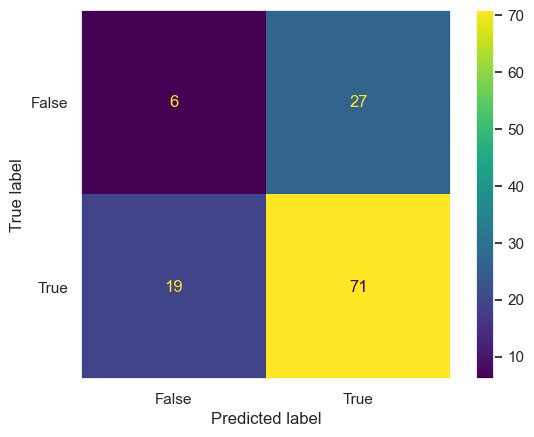

True negative: 6
False postive: 27
False negative: 19
True postive: 71


In [26]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cmt=confusion_matrix(y_test,y_pred_KNN)

disp=ConfusionMatrixDisplay(confusion_matrix=cmt,
                            display_labels = [False, True])
disp.plot()
plt.grid(False)
plt.show()


tn, fp, fn, tp = confusion_matrix(y_test,y_pred_KNN).ravel()
print("True negative:",tn)
print("False postive:",fp)
print("False negative:",fn)
print("True postive:",tp)

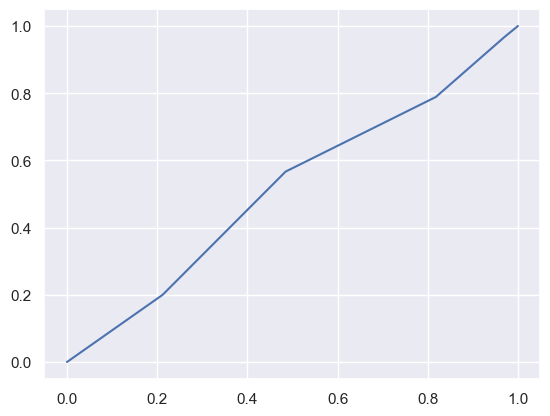

In [28]:
y_KNN_pred_prob=KNNtree.predict_proba(X_test)[:,1]   # Class-1 probabilities
fpr,tpr,threshold=roc_curve(y_test,y_KNN_pred_prob) 
plt.plot(fpr,tpr)
plt.show()

**Random Forest**

In [30]:
from sklearn.ensemble import RandomForestClassifier
RFtree=RandomForestClassifier()
RFtree.fit(X_train,y_train)

RandomForestClassifier()

In [31]:
y_pred_RFtree=RFtree.predict(X_test)

In [32]:
acc_RFtree=accuracy_score(y_test,y_pred_RFtree)
pre_RFtree=precision_score(y_test,y_pred_RFtree)
recall_RFtree=recall_score(y_test,y_pred_RFtree)
f1s_RFtree=f1_score(y_test,y_pred_RFtree)
print(round(acc_RFtree,2))
print(round(pre_RFtree,2))
print(round(recall_RFtree,2))
print(round(f1s_RFtree,2))

0.77
0.81
0.9
0.85


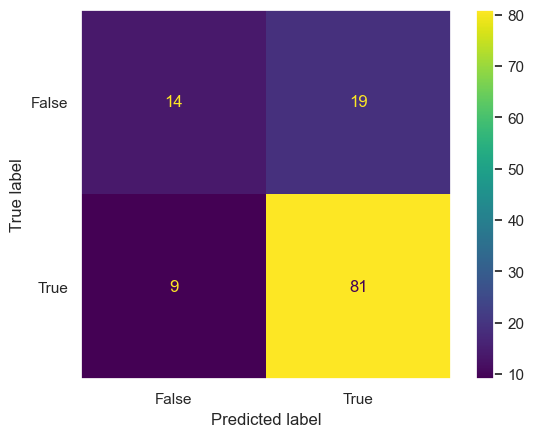

True negative: 14
False postive: 19
False negative: 9
True postive: 81


In [33]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cmt=confusion_matrix(y_test,y_pred_RFtree)

disp=ConfusionMatrixDisplay(confusion_matrix=cmt,
                            display_labels = [False, True])
disp.plot()
plt.grid(False)
plt.show()


tn, fp, fn, tp = confusion_matrix(y_test,y_pred_RFtree).ravel()
print("True negative:",tn)
print("False postive:",fp)
print("False negative:",fn)
print("True postive:",tp)

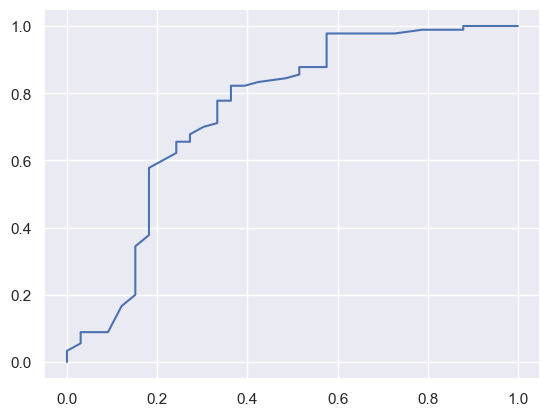

In [34]:
y_RF_pred_prob=RFtree.predict_proba(X_test)[:,1]   # Class-1 probabilities
fpr,tpr,threshold=roc_curve(y_test,y_RF_pred_prob) 
plt.plot(fpr,tpr)
plt.show()

In [36]:
dict1={'Accuracy':[acc_dt,acc_KNN,acc_log,acc_NB,acc_RFtree],
      "Precision":[pre_dt,pre_KNN,pre_log,pre_NB,pre_RFtree],
      "Recall":[recall_dt,recall_KNN,recall_log,recall_NB,recall_RFtree],
      "F1-score":[f1s_dt,f1s_KNN,f1s_log,f1s_NB,f1s_RFtree]}

pd.DataFrame(dict1,index=['DT','KNN','Logistic','Naive Bayes','Random Forest'])


,Accuracy,Precision,Recall,F1-score
DT,0.707317,0.829268,0.755556,0.790698
KNN,0.626016,0.724490,0.788889,0.755319
Logistic,0.829268,0.822430,0.977778,0.893401
Naive Bayes,0.829268,0.822430,0.977778,0.893401
Random Forest,0.772358,0.810000,0.900000,0.852632
